In [16]:
import pandas as pd
import os
import re
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import torchvision.transforms.functional as F
import numpy as np
from PIL import Image



pwd = os.getcwd()
dataset_path = '../dataset'
data_path = dataset_path + '/ShenzhenMontgomerySeg'
test_datafile = data_path + '/test.csv'
train_datafile = data_path + '/train.csv'

#read CSV train file
test_datafile = Path(train_datafile)
if not test_datafile.is_file():
    print("Train CSV file not found")
    exit()
test_data = pd.read_csv(test_datafile, index_col=0)


train_datafile = Path(test_datafile)
if not train_datafile.is_file():
    print("Test CSV file not found")
    exit()
train_data = pd.read_csv(test_datafile, index_col=0)

def grid_show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(ncols=len(imgs), squeeze=False)
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[0, i].imshow(np.asarray(img))
        axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    plt.show()

def plot_image(image_sample):
    plt.imshow(image_sample, cmap='gray')  # Puoi cambiare 'gray' se l'immagine è a colori
    plt.axis('off')  # Rimuovi gli assi per una visualizzazione pulita
    plt.show()

def plot_grid_images(images, nrow=1):
    # for i in range(len(images)):
    #     images[i] = images[i].permute(2, 0, 1)
            
    grid = make_grid(images, nrow=nrow)
    grid = grid.permute(1, 2, 0)
    plot_image(grid)

def read_image_as_tensor(image_path):
    image = Image.open(image_path)
    image_tensor = F.to_tensor(image)
    return image_tensor

def downsample_image(image_tensor, h, w):
    image_tensor = F.resize(image_tensor, (h, w))
    return image_tensor



Image torch.Size([1, 2945, 2450]) mask torch.Size([1, 2945, 2450])
Image torch.Size([1, 224, 224]) mask torch.Size([1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..1.0000004].


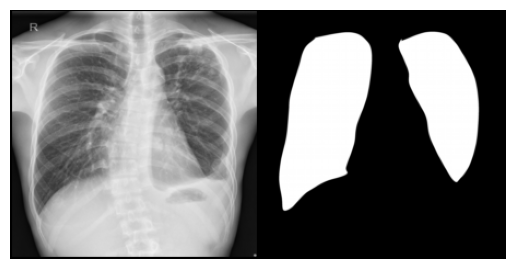

In [ ]:
import numpy
import torch
labels = []
samples = torch.tensor([])
sam = []
for index,col in train_data.iterrows():
    mask_filename = col['masks']
    sample_filename = col['images']
    sample_file = Path(data_path+'/'+sample_filename)
    mask_file = Path(data_path+'/'+mask_filename)

    if not sample_file.exists():
        print("Path %s does not exist" %sample_file)
    if not mask_file.exists():
        print("Path %s does not exist" %mask_file)

    # scrivimi il codice per converitre una png in un tensore
 

    image_tensor = read_image_as_tensor(sample_file)
    mask_tensor = read_image_as_tensor(mask_file)
    print ( "Image %s mask %s" %(str(image_tensor.shape), str(mask_tensor.shape)))
    downsampled_image = downsample_image(image_tensor, 224, 224)
    downsampled_mask = downsample_image(mask_tensor, 224, 224)
    print ( "Image %s mask %s" %(str(downsampled_image.shape), str(downsampled_mask.shape)))

    plot_grid_images([downsampled_image, downsampled_mask], nrow=2)
   